## House price Analysis(makaan.com)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import re

### Data Collection using web scraping technique

In [2]:
URL = 'https://www.makaan.com/listings?baths=any&propertyType=apartment,villa,independent-house&budget=2500000,&ageOfProperty=any&furnished=furnished&listingType=buy&pageType=LISTINGS_PROPERTY_URLS&cityName=Hyderabad&cityId=12&templateId=MAKAAN_CITY_LISTING_BUY&sellerRating=any'

In [3]:
page=requests.get(URL)

In [4]:
page.status_code

200

In [5]:
pagecontent = page.text
pagecontent

'<!doctype html> <html lang="en"><head><meta http-equiv="Content-type" content="text/html; charset=utf-8"><title>properties in Hyderabad :Makaan.com</title><meta name="theme-color" content="#fff" id="themeColor"><meta content="origin" name="referrer"><meta name="p:domain_verify" content="55ce01b3ca93c05fd5a41439a23dd0d9"><meta name="fb:pages" content="155462194517712"><meta name="viewport" content="minimum-scale=1.0, width=device-width, initial-scale=1.0, maximum-scale=5.0, user-scalable=no"><link rel="preload" href="//static.makaan.com/scripts/vendor/require.min.js" as="script"><link rel="preload" href="//static.makaan.com/scripts/main.ff46637b.js" as="script"><link rel="preload" href="//static.makaan.com/scripts/infra.a7ac1784.js" as="script"><link rel="preload" href="//static.makaan.com/scripts/dependency/commonBundle.8af07cde.js" as="script"><link rel="preload" href="//static.makaan.com/scripts/app.7d0dcfaa.js" as="script"><meta name="twitter:card" content="summary"><meta name="twi

In [6]:
soup = BeautifulSoup(pagecontent)

In [7]:
type(soup)

bs4.BeautifulSoup

In [8]:
soup.find_all('td',attrs={'price'})

[<td class="price"><div data-type="price-link"><sup class="rupee currency"> </sup><span class="val" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer"><meta content="https://www.makaan.com/hyderabad/swaraj-homes-nectar-gardens-in-madhapur-19661603/4bhk-4t-3650-sqft-villa" itemprop="url"/><meta content="70000000 " itemprop="price"/><meta content="INR" itemprop="priceCurrency"/>7</span><span class="unit"> Cr</span></div></td>,
 <td class="price"><div data-type="price-link"><sup class="rupee currency"> </sup><span class="val" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer"><meta content="https://www.makaan.com/hyderabad/reputed-builder-indira-nivas-in-kukatpally-19852866/3bhk-3t-1500-sqft-apartment" itemprop="url"/><meta content="6500000 " itemprop="price"/><meta content="INR" itemprop="priceCurrency"/>65</span><span class="unit"> L</span></div></td>,
 <td class="price"><div data-type="price-link"><sup class="rupee currency"> </sup><span class="val" itempr

list_1 = soup.find_all('div',attrs={'class':'infoWrap'})
list_1

In [10]:
list_1[0]

<div class="infoWrap" itemprop="event" itemref="itemImageFor-19661603" itemscope="" itemtype="http://schema.org/Event"><div class="title-line-wrap"><div class="title-line"><a class="typelink" data-type="listing-link" href="https://www.makaan.com/hyderabad/swaraj-homes-nectar-gardens-in-madhapur-19661603/4bhk-4t-3650-sqft-villa" itemprop="url" target="_blank"><meta content="4 BHK Villa for sale" id="itemNameFor-19661603" itemprop="name"/><strong><span class="val">4 </span><span>BHK </span><span>Villa</span></strong></a><span class="project-wrap"> in <strong><a class="projName" data-link-name="Swaraj Homes Nectar Gardens" data-link-type="project overview" data-track-label="19661603_1_1498348_select" data-type="projName" href="https://www.makaan.com/hyderabad/swaraj-homes-nectar-gardens-in-madhapur-1498348" target="_blank" title="Go to Swaraj Homes Nectar Gardens"><span>Swaraj Homes Nectar Gardens</span></a></strong></span></div><div style="width:100%"><div class="locWrap" itemprop="locat

In [11]:
for i in list_1:
    price = i.find('div',attrs={'data-type':'price-link'})
    print(price.text)

 7 Cr
 65 L
 55 L
 68 L
 2.35 Cr
 4 Cr
 70 L
 1.75 Cr
 55 L
 74 L
 66 L
 54 L
 1.48 Cr
 54 L
 1.2 Cr
 75 L
 68.25 L
 75 L
 4.5 Cr
 1.6 Cr


In [ ]:
price_list = []
bedroom_list = []
area_list = []
price_sqfeet = []
details_list = []
location_list = []
name_list = []
extra_details = []
for i in range(1,42):
    URL = 'https://www.makaan.com/listings?baths=any&propertyType=apartment,villa,independent-house&budget=2500000,&ageOfProperty=any&furnished=furnished&listingType=buy&pageType=LISTINGS_PROPERTY_URLS&cityName=Hyderabad&cityId=12&templateId=MAKAAN_CITY_LISTING_BUY&sellerRating=any&page='+str(i)
    page = requests.get(URL)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
    list_1 = soup.find_all('div',attrs={'class':'infoWrap'})
    
    for j in list_1:
        price = j.find('div',attrs={'data-type':'price-link'})
        if price is None:
            price_list.append(np.NaN)
        else:
            price_list.append(price.text)
        bedroom = j.find('span',attrs={'class':'val'})
        if bedroom is None:
            bedroom_list.append(np.NaN)
        else:
            bedroom_list.append(bedroom.text)
        area = j.find('td',attrs={'class':'size'})
        if area is None:
            area_list.append(np.NaN)
        else:
            area_list.append(area.text)
        pricesqfeet = j.find('td',attrs={'class':'lbl rate'})
        if pricesqfeet is None:
            price_sqfeet.append(np.NaN)
        else:
            price_sqfeet.append(pricesqfeet.text)
        details = j.find('a',attrs={'target':'_blank'})
        if details is None:
            details_list.append(np.NaN)
        else:
            details_list.append(details.text)
        location = j.find('span',attrs={'itemprop':'addressLocality'})
        if location is None:
            location_list.append(np.NaN)
        else:
            location_list.append(location.text)
        name = j.find('a',attrs={'class':'projName'})
        if name is None:
            name_list.append(np.NaN)
        else:
            name_list.append(name.text)
        extra = j.find('ul',attrs={'class':'listing-details'})
        if extra is None:
            extra_details.append(np.NaN)
        else:
            extra_details.append(extra.text)

In [13]:
len(price_list)

817

In [14]:
len(bedroom_list)

817

In [15]:
len(area_list)

817

In [16]:
len(price_sqfeet)

817

In [17]:
len(location_list)

817

In [18]:
len(name_list)

817

In [19]:
len(extra_details)

817

In [20]:
df = pd.DataFrame({'Name':name_list,'Details':details_list,'Location':location_list,'Area in sqfeet':area_list,'price per Sqfeet':price_sqfeet,'price':price_list,'BHK':bedroom_list,'Extra_details':extra_details})

In [21]:
df.head()

,Name,Details,Location,Area in sqfeet,price per Sqfeet,price,BHK,Extra_details
0,Swaraj Homes Nectar Gardens,4 BHK Villa,Madhapur,3650,"19,178 / sq ft",7 Cr,4,4 BathroomsResale East facing
1,Reputed Builder Indira Nivas,3 BHK Apartment,Kukatpally,1500,"4,333 / sq ft",65 L,3,3 BathroomsResale West facing
2,Swaraj Homes Satya Trilok Tower,2 BHK Apartment,Sainikpuri,1000,"5,500 / sq ft",55 L,2,2 BathroomsResale
3,NaN,2 BHK Apartment,Kompally,1270,"5,354 / sq ft",68 L,2,2 BathroomsResale
4,NaN,4 BHK Villa,Sainikpuri,2700,"8,703 / sq ft",2.35 Cr,4,4 BathroomsResale


In [22]:
df.to_csv(r'C:\Users\Dell\downloads\raw_data1.csv')

In [23]:
df.Details[0]

'4 BHK Villa'

### Data cleaning

In [24]:
po = re.compile('[A-Z][a-z]+')
po.search(df.Details[6]).group()

'Independent'

In [25]:
df['Type']=df['Details'].apply(lambda x:re.compile('[A-Z][a-z]+').search(x).group())

In [26]:
df.head(10)

,Name,Details,Location,Area in sqfeet,price per Sqfeet,price,BHK,Extra_details,Type
0,Swaraj Homes Nectar Gardens,4 BHK Villa,Madhapur,3650,"19,178 / sq ft",7 Cr,4,4 BathroomsResale East facing,Villa
1,Reputed Builder Indira Nivas,3 BHK Apartment,Kukatpally,1500,"4,333 / sq ft",65 L,3,3 BathroomsResale West facing,Apartment
2,Swaraj Homes Satya Trilok Tower,2 BHK Apartment,Sainikpuri,1000,"5,500 / sq ft",55 L,2,2 BathroomsResale,Apartment
3,NaN,2 BHK Apartment,Kompally,1270,"5,354 / sq ft",68 L,2,2 BathroomsResale,Apartment
4,NaN,4 BHK Villa,Sainikpuri,2700,"8,703 / sq ft",2.35 Cr,4,4 BathroomsResale,Villa
5,Pavani Harmony,4 BHK Villa,Bandlaguda Jagir,3500,"11,428 / sq ft",4 Cr,4,4 BathroomsResale,Villa
6,NaN,2 BHK Independent House,Laxmiguda,1100,"6,363 / sq ft",70 L,2,3 - 4 years old3 BathroomsResale,Independent
7,NaN,7 BHK Independent House,Nagaram,5200,"3,365 / sq ft",1.75 Cr,7,7 BathroomsResale East facing,Independent
8,Subishi Town Centre,2 BHK Apartment,Mokila,1080,"5,092 / sq ft",55 L,2,7 - 8 years old2 BathroomsResale,Apartment
9,Tripura Gayathri Classic,4 BHK Apartment,Nallagandla Gachibowli,1102,"6,715 / sq ft",74 L,4,6 - 7 years old2 BathroomsResale,Apartment


In [27]:
df.Extra_details[0]

'4 BathroomsResale East facing'

In [28]:
df.Extra_details[9]

'6 - 7 years old2 BathroomsResale '

In [29]:
import re
re.findall("(\d)\sBathrooms",str(df['Extra_details'][22]))[0]

'2'

In [30]:
br = []
for i in df['Extra_details']:
    if "Bathrooms" in i:
        br.append(re.findall("(\d)\sBathrooms",str(i))[0])
    else:
        br.append(np.NaN)

In [31]:
df['Bathrooms'] = br

In [32]:
df.head()

,Name,Details,Location,Area in sqfeet,price per Sqfeet,price,BHK,Extra_details,Type,Bathrooms
0,Swaraj Homes Nectar Gardens,4 BHK Villa,Madhapur,3650,"19,178 / sq ft",7 Cr,4,4 BathroomsResale East facing,Villa,4
1,Reputed Builder Indira Nivas,3 BHK Apartment,Kukatpally,1500,"4,333 / sq ft",65 L,3,3 BathroomsResale West facing,Apartment,3
2,Swaraj Homes Satya Trilok Tower,2 BHK Apartment,Sainikpuri,1000,"5,500 / sq ft",55 L,2,2 BathroomsResale,Apartment,2
3,NaN,2 BHK Apartment,Kompally,1270,"5,354 / sq ft",68 L,2,2 BathroomsResale,Apartment,2
4,NaN,4 BHK Villa,Sainikpuri,2700,"8,703 / sq ft",2.35 Cr,4,4 BathroomsResale,Villa,4


In [33]:
s=[]
for i in df['Extra_details']:
    if 'Resale' in i:
       s.append(re.findall('Resale',str(i))[0])
    elif 'New' in i:
       s.append(re.findall('New',str(i))[0])
    else:
     s.append(np.NaN)        

In [34]:
df['status'] = s

In [35]:
df.head()

,Name,Details,Location,Area in sqfeet,price per Sqfeet,price,BHK,Extra_details,Type,Bathrooms,status
0,Swaraj Homes Nectar Gardens,4 BHK Villa,Madhapur,3650,"19,178 / sq ft",7 Cr,4,4 BathroomsResale East facing,Villa,4,Resale
1,Reputed Builder Indira Nivas,3 BHK Apartment,Kukatpally,1500,"4,333 / sq ft",65 L,3,3 BathroomsResale West facing,Apartment,3,Resale
2,Swaraj Homes Satya Trilok Tower,2 BHK Apartment,Sainikpuri,1000,"5,500 / sq ft",55 L,2,2 BathroomsResale,Apartment,2,Resale
3,NaN,2 BHK Apartment,Kompally,1270,"5,354 / sq ft",68 L,2,2 BathroomsResale,Apartment,2,Resale
4,NaN,4 BHK Villa,Sainikpuri,2700,"8,703 / sq ft",2.35 Cr,4,4 BathroomsResale,Villa,4,Resale


In [36]:
df['price per Sqfeet']=df['price per Sqfeet'].apply(lambda x:x.replace('/ sq ft',""))

In [37]:
df['price per Sqfeet']=df['price per Sqfeet'].apply(lambda x:x.replace(",",""))

In [38]:
df['price per Sqfeet']=df['price per Sqfeet'].astype(int,errors = 'raise')

In [39]:
df.head()

,Name,Details,Location,Area in sqfeet,price per Sqfeet,price,BHK,Extra_details,Type,Bathrooms,status
0,Swaraj Homes Nectar Gardens,4 BHK Villa,Madhapur,3650,19178,7 Cr,4,4 BathroomsResale East facing,Villa,4,Resale
1,Reputed Builder Indira Nivas,3 BHK Apartment,Kukatpally,1500,4333,65 L,3,3 BathroomsResale West facing,Apartment,3,Resale
2,Swaraj Homes Satya Trilok Tower,2 BHK Apartment,Sainikpuri,1000,5500,55 L,2,2 BathroomsResale,Apartment,2,Resale
3,NaN,2 BHK Apartment,Kompally,1270,5354,68 L,2,2 BathroomsResale,Apartment,2,Resale
4,NaN,4 BHK Villa,Sainikpuri,2700,8703,2.35 Cr,4,4 BathroomsResale,Villa,4,Resale


In [40]:
a=df.price.apply(lambda x:x.split())
a

0         [7, Cr]
1         [65, L]
2         [55, L]
3         [68, L]
4      [2.35, Cr]
          ...    
812       [77, L]
813       [50, L]
814       [95, L]
815       [90, L]
816       [95, L]
Name: price, Length: 817, dtype: object

In [41]:
x=[]
for i in range(0,len(a)):
    if a[i][1]=='Cr':
        x.append(int(float(a[i][0])*10000000))
    elif a[i][1]=='L':
        x.append(int(float(a[i][0])*100000))  

In [42]:
len(x)

817

In [43]:
len(a)

817

In [44]:
x[0]

70000000

In [45]:
df['price in lakhs'] = x

In [46]:
df.head()

,Name,Details,Location,Area in sqfeet,price per Sqfeet,price,BHK,Extra_details,Type,Bathrooms,status,price in lakhs
0,Swaraj Homes Nectar Gardens,4 BHK Villa,Madhapur,3650,19178,7 Cr,4,4 BathroomsResale East facing,Villa,4,Resale,70000000
1,Reputed Builder Indira Nivas,3 BHK Apartment,Kukatpally,1500,4333,65 L,3,3 BathroomsResale West facing,Apartment,3,Resale,6500000
2,Swaraj Homes Satya Trilok Tower,2 BHK Apartment,Sainikpuri,1000,5500,55 L,2,2 BathroomsResale,Apartment,2,Resale,5500000
3,NaN,2 BHK Apartment,Kompally,1270,5354,68 L,2,2 BathroomsResale,Apartment,2,Resale,6800000
4,NaN,4 BHK Villa,Sainikpuri,2700,8703,2.35 Cr,4,4 BathroomsResale,Villa,4,Resale,23500000


In [47]:
df.drop('price',axis=1,inplace = True)

In [48]:
df.head()

,Name,Details,Location,Area in sqfeet,price per Sqfeet,BHK,Extra_details,Type,Bathrooms,status,price in lakhs
0,Swaraj Homes Nectar Gardens,4 BHK Villa,Madhapur,3650,19178,4,4 BathroomsResale East facing,Villa,4,Resale,70000000
1,Reputed Builder Indira Nivas,3 BHK Apartment,Kukatpally,1500,4333,3,3 BathroomsResale West facing,Apartment,3,Resale,6500000
2,Swaraj Homes Satya Trilok Tower,2 BHK Apartment,Sainikpuri,1000,5500,2,2 BathroomsResale,Apartment,2,Resale,5500000
3,NaN,2 BHK Apartment,Kompally,1270,5354,2,2 BathroomsResale,Apartment,2,Resale,6800000
4,NaN,4 BHK Villa,Sainikpuri,2700,8703,4,4 BathroomsResale,Villa,4,Resale,23500000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              192 non-null    object
 1   Details           817 non-null    object
 2   Location          817 non-null    object
 3   Area in sqfeet    817 non-null    object
 4   price per Sqfeet  817 non-null    int32 
 5   BHK               817 non-null    object
 6   Extra_details     817 non-null    object
 7   Type              817 non-null    object
 8   Bathrooms         802 non-null    object
 9   status            657 non-null    object
 10  price in lakhs    817 non-null    int64 
dtypes: int32(1), int64(1), object(9)
memory usage: 67.1+ KB


In [50]:
df['Name'].fillna(df['Type'],inplace = True)

In [51]:
df.head()

,Name,Details,Location,Area in sqfeet,price per Sqfeet,BHK,Extra_details,Type,Bathrooms,status,price in lakhs
0,Swaraj Homes Nectar Gardens,4 BHK Villa,Madhapur,3650,19178,4,4 BathroomsResale East facing,Villa,4,Resale,70000000
1,Reputed Builder Indira Nivas,3 BHK Apartment,Kukatpally,1500,4333,3,3 BathroomsResale West facing,Apartment,3,Resale,6500000
2,Swaraj Homes Satya Trilok Tower,2 BHK Apartment,Sainikpuri,1000,5500,2,2 BathroomsResale,Apartment,2,Resale,5500000
3,Apartment,2 BHK Apartment,Kompally,1270,5354,2,2 BathroomsResale,Apartment,2,Resale,6800000
4,Villa,4 BHK Villa,Sainikpuri,2700,8703,4,4 BathroomsResale,Villa,4,Resale,23500000


In [52]:
df['Area in sqfeet'] = df['Area in sqfeet'].astype('int')

In [53]:
df['BHK'] = df['BHK'].astype('int')

In [54]:
df

,Name,Details,Location,Area in sqfeet,price per Sqfeet,BHK,Extra_details,Type,Bathrooms,status,price in lakhs
0,Swaraj Homes Nectar Gardens,4 BHK Villa,Madhapur,3650,19178,4,4 BathroomsResale East facing,Villa,4,Resale,70000000
1,Reputed Builder Indira Nivas,3 BHK Apartment,Kukatpally,1500,4333,3,3 BathroomsResale West facing,Apartment,3,Resale,6500000
2,Swaraj Homes Satya Trilok Tower,2 BHK Apartment,Sainikpuri,1000,5500,2,2 BathroomsResale,Apartment,2,Resale,5500000
3,Apartment,2 BHK Apartment,Kompally,1270,5354,2,2 BathroomsResale,Apartment,2,Resale,6800000
4,Villa,4 BHK Villa,Sainikpuri,2700,8703,4,4 BathroomsResale,Villa,4,Resale,23500000
...,...,...,...,...,...,...,...,...,...,...,...
812,Apartment,3 BHK Apartment,Trimulgherry,1700,4529,3,0 - 1 year old2 Bathrooms1st of 4floor,Apartment,2,NaN,7700000
813,Apartment,2 BHK Apartment,Trimalgherry,1050,4761,2,0 - 1 year old2 Bathrooms2nd of 3floor,Apartment,2,NaN,5000000
814,Independent,3 BHK Independent House,Malkajgiri,1300,7307,3,2 BathroomsResale East facing,Independent,2,Resale,9500000
815,Independent,2 BHK Independent House,Dammaiguda,1350,6666,2,2 BathroomsResale East facing,Independent,2,Resale,9000000


In [55]:
df[df['Bathrooms'].isnull()]

,Name,Details,Location,Area in sqfeet,price per Sqfeet,BHK,Extra_details,Type,Bathrooms,status,price in lakhs
358,Apartment,2 BHK Apartment,Boduppal,1050,3333,2,Resale,Apartment,NaN,Resale,3500000
401,Apartment,3 BHK Apartment,Mallapur,1900,4210,3,Resale,Apartment,NaN,Resale,8000000
402,Apartment,3 BHK Apartment,Mallapur,1750,3428,3,Resale,Apartment,NaN,Resale,6000000
403,Apartment,2 BHK Apartment,Mallapur,1150,3304,2,Resale,Apartment,NaN,Resale,3800000
405,Villa,5 BHK Villa,Boduppal,4000,3750,5,Resale,Villa,NaN,Resale,15000000
406,Reputed Builder Tarnaka Towers,6 BHK Villa,Uppal Kalan,4000,8750,6,Resale,Villa,NaN,Resale,35000000
407,Apartment,3 BHK Apartment,Nacharam,1250,3840,3,5 - 6 years oldResale,Apartment,NaN,Resale,4800000
408,Apartment,2 BHK Apartment,Nacharam,1200,4166,2,5 - 6 years oldResale,Apartment,NaN,Resale,5000000
412,Apartment,3 BHK Apartment,Nacharam,2500,4400,3,5 - 6 years oldNew,Apartment,NaN,New,11000000
414,Apartment,2 BHK Apartment,Nacharam,1450,3793,2,5 - 6 years oldResale,Apartment,NaN,Resale,5500000


In [56]:
df["Bathrooms"].fillna(df["BHK"],inplace = True)

In [57]:
df

,Name,Details,Location,Area in sqfeet,price per Sqfeet,BHK,Extra_details,Type,Bathrooms,status,price in lakhs
0,Swaraj Homes Nectar Gardens,4 BHK Villa,Madhapur,3650,19178,4,4 BathroomsResale East facing,Villa,4,Resale,70000000
1,Reputed Builder Indira Nivas,3 BHK Apartment,Kukatpally,1500,4333,3,3 BathroomsResale West facing,Apartment,3,Resale,6500000
2,Swaraj Homes Satya Trilok Tower,2 BHK Apartment,Sainikpuri,1000,5500,2,2 BathroomsResale,Apartment,2,Resale,5500000
3,Apartment,2 BHK Apartment,Kompally,1270,5354,2,2 BathroomsResale,Apartment,2,Resale,6800000
4,Villa,4 BHK Villa,Sainikpuri,2700,8703,4,4 BathroomsResale,Villa,4,Resale,23500000
...,...,...,...,...,...,...,...,...,...,...,...
812,Apartment,3 BHK Apartment,Trimulgherry,1700,4529,3,0 - 1 year old2 Bathrooms1st of 4floor,Apartment,2,NaN,7700000
813,Apartment,2 BHK Apartment,Trimalgherry,1050,4761,2,0 - 1 year old2 Bathrooms2nd of 3floor,Apartment,2,NaN,5000000
814,Independent,3 BHK Independent House,Malkajgiri,1300,7307,3,2 BathroomsResale East facing,Independent,2,Resale,9500000
815,Independent,2 BHK Independent House,Dammaiguda,1350,6666,2,2 BathroomsResale East facing,Independent,2,Resale,9000000


In [58]:
df["status"].fillna("Not mentioned",inplace = True)

In [59]:
df

,Name,Details,Location,Area in sqfeet,price per Sqfeet,BHK,Extra_details,Type,Bathrooms,status,price in lakhs
0,Swaraj Homes Nectar Gardens,4 BHK Villa,Madhapur,3650,19178,4,4 BathroomsResale East facing,Villa,4,Resale,70000000
1,Reputed Builder Indira Nivas,3 BHK Apartment,Kukatpally,1500,4333,3,3 BathroomsResale West facing,Apartment,3,Resale,6500000
2,Swaraj Homes Satya Trilok Tower,2 BHK Apartment,Sainikpuri,1000,5500,2,2 BathroomsResale,Apartment,2,Resale,5500000
3,Apartment,2 BHK Apartment,Kompally,1270,5354,2,2 BathroomsResale,Apartment,2,Resale,6800000
4,Villa,4 BHK Villa,Sainikpuri,2700,8703,4,4 BathroomsResale,Villa,4,Resale,23500000
...,...,...,...,...,...,...,...,...,...,...,...
812,Apartment,3 BHK Apartment,Trimulgherry,1700,4529,3,0 - 1 year old2 Bathrooms1st of 4floor,Apartment,2,Not mentioned,7700000
813,Apartment,2 BHK Apartment,Trimalgherry,1050,4761,2,0 - 1 year old2 Bathrooms2nd of 3floor,Apartment,2,Not mentioned,5000000
814,Independent,3 BHK Independent House,Malkajgiri,1300,7307,3,2 BathroomsResale East facing,Independent,2,Resale,9500000
815,Independent,2 BHK Independent House,Dammaiguda,1350,6666,2,2 BathroomsResale East facing,Independent,2,Resale,9000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              817 non-null    object
 1   Details           817 non-null    object
 2   Location          817 non-null    object
 3   Area in sqfeet    817 non-null    int32 
 4   price per Sqfeet  817 non-null    int32 
 5   BHK               817 non-null    int32 
 6   Extra_details     817 non-null    object
 7   Type              817 non-null    object
 8   Bathrooms         817 non-null    object
 9   status            817 non-null    object
 10  price in lakhs    817 non-null    int64 
dtypes: int32(3), int64(1), object(7)
memory usage: 60.8+ KB


In [61]:
df['Area in sqfeet'] = df['Area in sqfeet'].astype('int')

In [62]:
df['BHK'] = df['BHK'].astype('int')

In [63]:
df["Bathrooms"] = df["Bathrooms"].astype('int')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              817 non-null    object
 1   Details           817 non-null    object
 2   Location          817 non-null    object
 3   Area in sqfeet    817 non-null    int32 
 4   price per Sqfeet  817 non-null    int32 
 5   BHK               817 non-null    int32 
 6   Extra_details     817 non-null    object
 7   Type              817 non-null    object
 8   Bathrooms         817 non-null    int32 
 9   status            817 non-null    object
 10  price in lakhs    817 non-null    int64 
dtypes: int32(4), int64(1), object(6)
memory usage: 57.6+ KB


In [65]:
df.drop('Details',axis=1,inplace = True)

In [66]:
df.drop('Extra_details',axis = 1,inplace = True)

In [67]:
df.head()

,Name,Location,Area in sqfeet,price per Sqfeet,BHK,Type,Bathrooms,status,price in lakhs
0,Swaraj Homes Nectar Gardens,Madhapur,3650,19178,4,Villa,4,Resale,70000000
1,Reputed Builder Indira Nivas,Kukatpally,1500,4333,3,Apartment,3,Resale,6500000
2,Swaraj Homes Satya Trilok Tower,Sainikpuri,1000,5500,2,Apartment,2,Resale,5500000
3,Apartment,Kompally,1270,5354,2,Apartment,2,Resale,6800000
4,Villa,Sainikpuri,2700,8703,4,Villa,4,Resale,23500000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              817 non-null    object
 1   Location          817 non-null    object
 2   Area in sqfeet    817 non-null    int32 
 3   price per Sqfeet  817 non-null    int32 
 4   BHK               817 non-null    int32 
 5   Type              817 non-null    object
 6   Bathrooms         817 non-null    int32 
 7   status            817 non-null    object
 8   price in lakhs    817 non-null    int64 
dtypes: int32(4), int64(1), object(4)
memory usage: 44.8+ KB


In [69]:
df.duplicated().sum()

84

In [70]:
df.drop_duplicates(inplace = True)

In [71]:
df.duplicated().sum()

0

In [72]:
len(df)

733

In [73]:
df.to_csv(r"C:\Users\Dell\downloads\cleaned_data.csv")

### Data Exploration

In [74]:
df.describe()

,Area in sqfeet,price per Sqfeet,BHK,Bathrooms,price in lakhs
count,733.000000,733.000000,733.000000,733.000000,7.330000e+02
mean,2231.688950,7643.654843,3.148704,2.886767,2.010407e+07
std,1528.824581,4780.623343,1.404905,1.361854,2.967082e+07
min,260.000000,2439.000000,1.000000,1.000000,2.500000e+06
25%,1200.000000,5052.000000,2.000000,2.000000,6.509999e+06
50%,1706.000000,6269.000000,3.000000,2.000000,1.100000e+07
75%,2700.000000,8571.000000,4.000000,3.000000,2.000000e+07
max,12000.000000,45000.000000,10.000000,9.000000,3.600000e+08


In [75]:
df.Location.value_counts()

Boduppal            27
Manikonda           26
Kukatpally          22
Banjara Hills       20
Kondapur            20
                    ..
Nallagandla Road     1
Hyder Nagar          1
Mettuguda            1
Medchal              1
Road Number 13       1
Name: Location, Length: 183, dtype: int64

In [76]:
df.Type.value_counts()

Apartment      484
Independent    152
Villa           93
Studio           4
Name: Type, dtype: int64

In [77]:
df.mean()

C:\Users\Dell\AppData\Local\Temp\ipykernel_5092\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Area in sqfeet      2.231689e+03
price per Sqfeet    7.643655e+03
BHK                 3.148704e+00
Bathrooms           2.886767e+00
price in lakhs      2.010407e+07
dtype: float64

In [78]:
df['price in lakhs'].max()

360000000

In [79]:
df['price in lakhs'].min()

2500000

In [80]:
df.std()

C:\Users\Dell\AppData\Local\Temp\ipykernel_5092\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Area in sqfeet      1.528825e+03
price per Sqfeet    4.780623e+03
BHK                 1.404905e+00
Bathrooms           1.361854e+00
price in lakhs      2.967082e+07
dtype: float64

### Data Visualization

<AxesSubplot:xlabel='BHK', ylabel='count'>

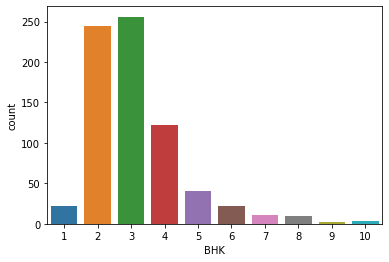

In [81]:
sns.countplot(x='BHK',data = df)

* 3BHK and 2BHK houses are more for sale than other houses in Hyderabad 

<AxesSubplot:xlabel='Bathrooms', ylabel='count'>

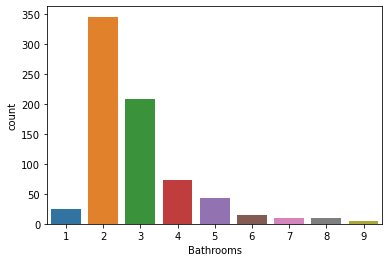

In [82]:
sns.countplot(x='Bathrooms',data = df)

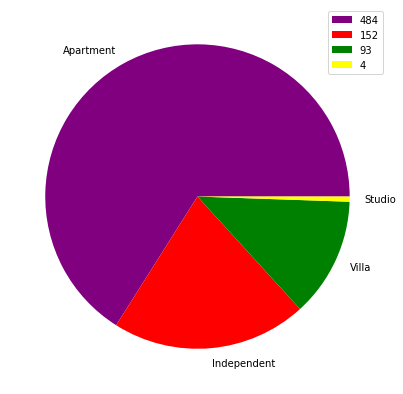

In [105]:
plt.figure(figsize=(7,7))
number = df.Type.value_counts()
values = number.values
type = number.index
plt.pie(values,labels=type,colors=["purple","red","green","yellow"])
plt.legend(values)
plt.show()

* Apartments are more for sale in Hyderabad

In [85]:
df.status.value_counts()

Resale           491
Not mentioned    153
New               89
Name: status, dtype: int64

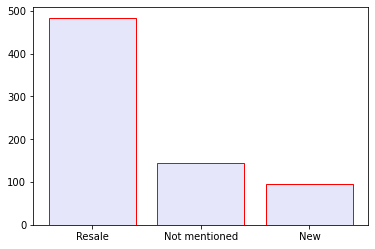

In [86]:
status=["Resale","Not mentioned","New"]
values = [484,145,95]
plt.bar(status,values,color="Lavender",edgecolor="Red")
plt.show()

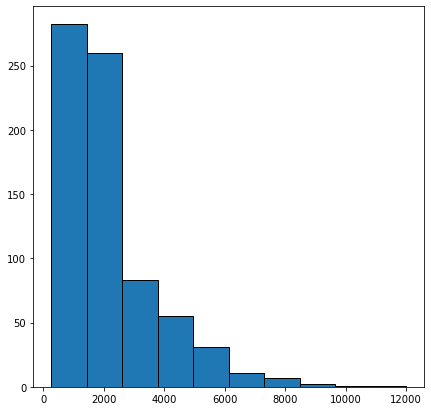

In [87]:
values = df["Area in sqfeet"]
plt.figure(figsize=(7,7))
plt.hist(values,histtype="bar",edgecolor="black",bins=10)
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price in lakhs'>

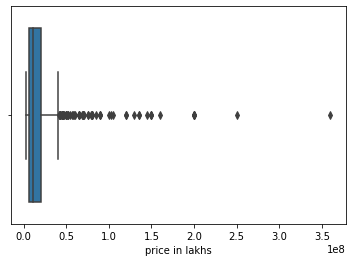

In [88]:
sns.boxplot('price in lakhs',data = df)

In [89]:
Q1,Q3 = df["price in lakhs"].quantile([.25,.75])
print(Q1)
print(Q3)

6509999.0
20000000.0


* 50 percent of the houses prices are distributed between 67 lakhs to 2.11 crores
* Highest price for house in Hyderabad for sale is 36 crores

In [90]:
df.sort_values("price per Sqfeet",ascending = False)

,Name,Location,Area in sqfeet,price per Sqfeet,BHK,Type,Bathrooms,status,price in lakhs
96,Independent,Banjara Hills,2000,45000,3,Independent,3,New,90000000
585,Villa,Jubilee Hills,8500,42352,6,Villa,6,Resale,360000000
559,Bliss Vinayaka,West Marredpally,5000,40000,7,Apartment,7,Not mentioned,200000000
71,NK Quiet Lands,Gachibowli,4000,33750,4,Villa,4,Resale,135000000
345,Villa,Jubilee Hills,7500,33333,4,Villa,4,Resale,250000000
...,...,...,...,...,...,...,...,...,...
417,Apartment,Mallapur,1300,2692,2,Apartment,2,Resale,3500000
297,Independent,Malkajgiri,6700,2686,9,Independent,2,Resale,18000000
806,Independent,Malkajgiri,6700,2686,9,Independent,2,New,18000000
639,Independent,Alwal,3200,2500,3,Independent,4,Resale,8000000


* Price per squarefeet is more in Banjara Hills and Jubilee Hills

In [91]:
df.sort_values("price in lakhs",ascending = False)

,Name,Location,Area in sqfeet,price per Sqfeet,BHK,Type,Bathrooms,status,price in lakhs
585,Villa,Jubilee Hills,8500,42352,6,Villa,6,Resale,360000000
345,Villa,Jubilee Hills,7500,33333,4,Villa,4,Resale,250000000
63,Sri Esmeralda Fortune,Serilingampally,6200,32258,5,Villa,7,Resale,200000000
584,Independent,Jubilee Hills,6084,32873,4,Independent,5,Resale,200000000
559,Bliss Vinayaka,West Marredpally,5000,40000,7,Apartment,7,Not mentioned,200000000
...,...,...,...,...,...,...,...,...,...
537,Apartment,Moosapet,650,4307,1,Apartment,1,Resale,2800000
640,Reputed Builder R K MANSION,Manikonda,560,5000,1,Apartment,1,Resale,2800000
673,Panduranga Panduranga Heights,Nizampet,650,4153,1,Apartment,1,Not mentioned,2700000
159,Apartment,Aminpur,869,3107,2,Apartment,2,Resale,2700000


* We see highest cost(36 Crores) Villa is in Jubilee Hills for sale 

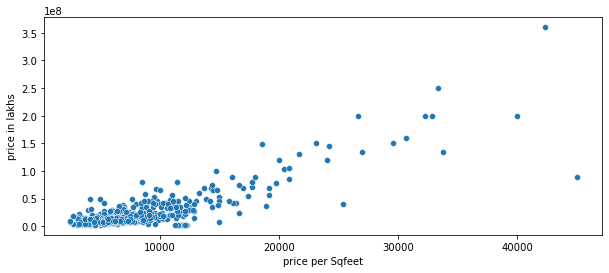

In [92]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='price per Sqfeet',y='price in lakhs',data = df)
plt.show()

* As price per sqfeet increasesprice of the house increases

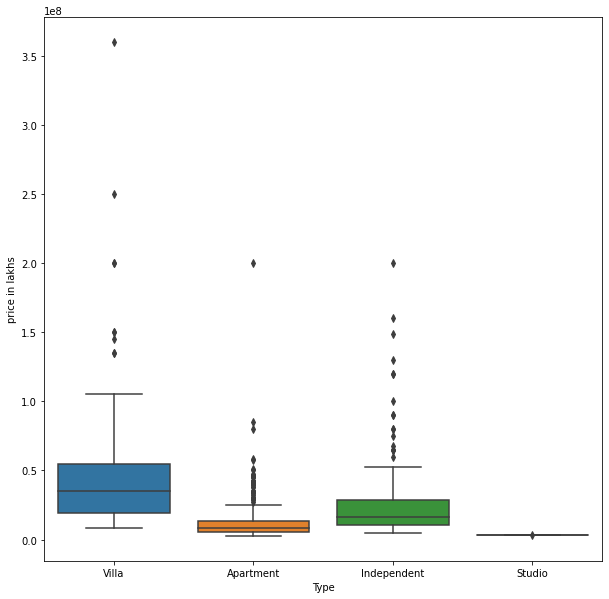

In [94]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Type",y = "price in lakhs",data = df)
plt.show()

* Villa prices are more when compared to other kind of houses

### Houses whose prices are ranging from 25 to 50 lakhs

In [95]:
h = df[(df["price in lakhs"]>=2500000) & (df["price in lakhs"]<=5000000)]
h

,Name,Location,Area in sqfeet,price per Sqfeet,BHK,Type,Bathrooms,status,price in lakhs
21,Apartment,Kushaiguda,960,5208,2,Apartment,2,Resale,5000000
41,Apartment,Dammaiguda,909,4180,2,Apartment,2,Resale,3800000
42,Parijatha Pride,Shamirpet,1000,3500,2,Apartment,2,Resale,3500000
75,Apartment,Pragathi Nagar Kukatpally,960,5052,2,Apartment,2,Resale,4849000
82,Apartment,Nagole,1102,3493,2,Apartment,2,New,3850000
...,...,...,...,...,...,...,...,...,...
776,Swaraj Homes Mythri Residency,Chandanagar,850,5305,2,Apartment,2,Resale,4510000
785,Apartment,AS Rao Nagar,1000,4500,2,Apartment,2,Not mentioned,4500000
792,Apartment,Alwal,1250,4000,2,Apartment,2,Resale,5000000
793,Apartment,Mahindra Hills,700,4571,2,Apartment,2,Not mentioned,3200000


In [96]:
h.Type.value_counts()

Apartment      82
Studio          4
Independent     4
Name: Type, dtype: int64


* There is no Villa available for sale in Hyderabad whose price is ranging from 25 to 50 lakhs

### Houses whose prices are Ranging from 50 to 75 lakhs

In [106]:
h21 = df[(df["price in lakhs"]>5000000) & (df["price in lakhs"]<=7500000)]
h21

,Name,Location,Area in sqfeet,price per Sqfeet,BHK,Type,Bathrooms,status,price in lakhs
1,Reputed Builder Indira Nivas,Kukatpally,1500,4333,3,Apartment,3,Resale,6500000
2,Swaraj Homes Satya Trilok Tower,Sainikpuri,1000,5500,2,Apartment,2,Resale,5500000
3,Apartment,Kompally,1270,5354,2,Apartment,2,Resale,6800000
6,Independent,Laxmiguda,1100,6363,2,Independent,3,Resale,7000000
8,Subishi Town Centre,Mokila,1080,5092,2,Apartment,2,Resale,5500000
...,...,...,...,...,...,...,...,...,...
782,Apartment,Sainikpuri,1558,4813,3,Apartment,2,Not mentioned,7500000
783,Apartment,Old Bowenpally,1425,5263,3,Apartment,2,Not mentioned,7500000
786,Apartment,Macha Bolarum,1330,5639,2,Apartment,2,Not mentioned,7500000
790,Apartment,Secunderabad Railway Station Road,1200,6250,3,Apartment,2,Not mentioned,7500000


In [108]:
h21.Type.value_counts()

Apartment      143
Independent      5
Name: Type, dtype: int64

* again there is no villa for sale in Hyderabad whose price ranging between 50 to 75 lakhs

In [109]:
h22 = df[(df["price in lakhs"]>7500000) & (df["price in lakhs"]<=10000000)]
h22

,Name,Location,Area in sqfeet,price per Sqfeet,BHK,Type,Bathrooms,status,price in lakhs
32,Independent,Dammaiguda,1548,5813,2,Independent,2,Resale,9000000
36,Apartment,Kondapur,1640,5487,3,Apartment,3,Resale,9000000
39,Apartment,Padmarao Nagar,1250,7120,2,Apartment,2,Resale,8900000
45,Kalyan Aishwarya Residency,Kothapet,1251,6554,2,Apartment,2,Resale,8200000
51,Independent,Durganagar,1125,7022,2,Independent,3,Resale,7900000
...,...,...,...,...,...,...,...,...,...
809,Apartment,Alwal,1650,6060,3,Apartment,2,Not mentioned,10000000
812,Apartment,Trimulgherry,1700,4529,3,Apartment,2,Not mentioned,7700000
814,Independent,Malkajgiri,1300,7307,3,Independent,2,Resale,9500000
815,Independent,Dammaiguda,1350,6666,2,Independent,2,Resale,9000000


In [111]:
h22.Type.value_counts()

Apartment      84
Independent    29
Villa           2
Name: Type, dtype: int64

In [112]:
h22[(h22.Type)=="Villa"]

,Name,Location,Area in sqfeet,price per Sqfeet,BHK,Type,Bathrooms,status,price in lakhs
312,Villa,Ibrahimpatnam,2200,3909,4,Villa,3,New,8600000
538,Siora Meadows,Manikonda,1460,5600,3,Villa,2,Resale,8176000


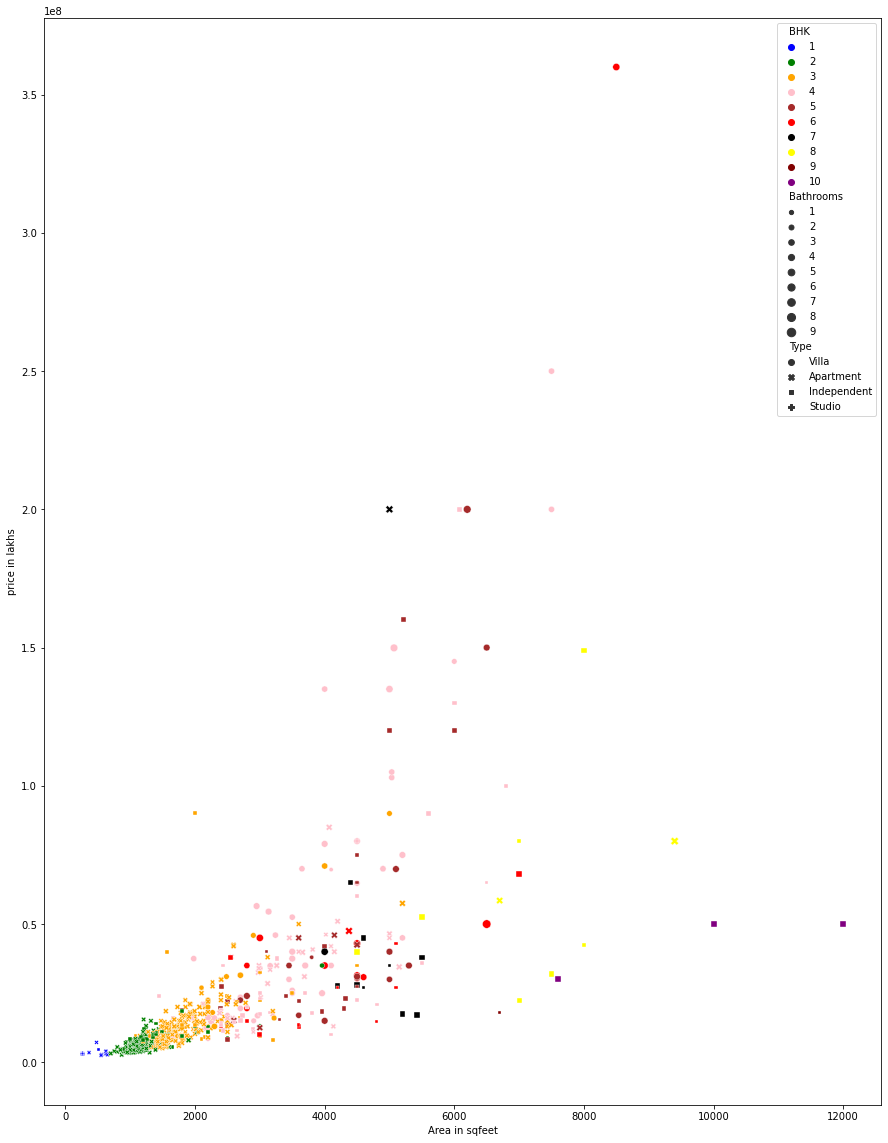

In [97]:
plt.figure(figsize=(15,20))
color_dict = dict({1:'blue',2:'green',3:'orange',4:'pink',5:'brown',6:'red',7:'black',8:'yellow',9:'maroon',10:'purple'})
sns.scatterplot(x='Area in sqfeet',y='price in lakhs',data = df,size='Bathrooms',hue='BHK',style='Type',palette=color_dict,legend='full')
plt.show()

In [98]:
df.Location.value_counts()

Boduppal            27
Manikonda           26
Kukatpally          22
Banjara Hills       20
Kondapur            20
                    ..
Nallagandla Road     1
Hyder Nagar          1
Mettuguda            1
Medchal              1
Road Number 13       1
Name: Location, Length: 183, dtype: int64

### one client asked for houses which are for sale in the areas near Hitec City

In [99]:
h3 = df[(df.Location=="Madhapur")|(df.Location=="Gachibowli")|(df.Location=="Kondapur")|(df.Location=="Manikonda")|(df.Location=="Shamshabad")]
h3

,Name,Location,Area in sqfeet,price per Sqfeet,BHK,Type,Bathrooms,status,price in lakhs
0,Swaraj Homes Nectar Gardens,Madhapur,3650,19178,4,Villa,4,Resale,70000000
11,Apartment,Manikonda,959,5630,2,Apartment,2,Resale,5400000
16,Apartment,Manikonda,1150,5934,2,Apartment,2,Resale,6825000
23,Anuhar 99 Parc,Manikonda,1650,6363,3,Apartment,3,Resale,10500000
24,Lanco Hills Apartments,Manikonda,3658,10880,4,Apartment,5,Resale,39800000
...,...,...,...,...,...,...,...,...,...
674,Aryamitra Trenton Park,Manikonda,1200,5166,2,Apartment,2,Resale,6200000
675,Apartment,Madhapur,3120,12179,3,Apartment,3,Not mentioned,38000000
714,My Jewel Crown,Manikonda,1230,5691,2,Apartment,2,Resale,7000000
757,Meridian Constructions Hyderabad Manikonda,Manikonda,1250,3960,2,Apartment,2,Resale,4950000


In [100]:
h3.groupby(['Location','Type','BHK'])["Area in sqfeet"].describe()

count         mean          std     min      25%  \
Location   Type        BHK                                                     
Gachibowli Apartment   2      1.0  2035.000000          NaN  2035.0  2035.00   
                       3      5.0  2573.000000  1487.881380  1550.0  1908.00   
                       4      4.0  3575.500000  1205.162645  2576.0  2576.00   
                       5      1.0  4150.000000          NaN  4150.0  4150.00   
           Independent 8      1.0  5500.000000          NaN  5500.0  5500.00   
           Studio      1      1.0   265.000000          NaN   265.0   265.00   
           Villa       4      1.0  4000.000000          NaN  4000.0  4000.00   
Kondapur   Apartment   1      3.0   298.333333    57.735027   265.0   265.00   
                       2      6.0  1162.666667   120.037772  1000.0  1079.50   
                       3      5.0  1895.800000   356.340006  1574.0  1640.00   
                       4      2.0  4060.000000  1329.360749  3120.0  3590.00   
           Studio      1      3.0   265.333333     4.163332   262.0   263.00   
           Villa       3      1.0  2900.000000          NaN  2900.0  2900.00   
Madhapur   Apartment   3      5.0  2334.000000   639.974609  1560.0  1800.00   
                       4      3.0  3438.333333   564.055257  2985.0  3122.50   
                       6      1.0  4375.000000          NaN  4375.0  4375.00   
           Villa       4      2.0  3575.000000   106.066017  3500.0  3537.50   
Manikonda  Apartment   1      1.0   560.000000          NaN   560.0   560.00   
                       2     11.0  1150.363636   118.573414   959.0  1075.00   
                       3      8.0  1707.375000   247.647755  1400.0  1543.75   
                       4      3.0  3501.666667   297.136893  3159.0  3408.50   
                       5      1.0  4500.000000          NaN  4500.0  4500.00   
           Villa       3      1.0  1460.000000          NaN  1460.0  1460.00   
                       6      1.0  6500.000000          NaN  6500.0  6500.00   
Shamshabad Independent 7      1.0  5421.000000          NaN  5421.0  5421.00   
           Villa       2      1.0  3960.000000          NaN  3960.0  3960.00   

                               50%     75%     max  
Location   Type        BHK                          
Gachibowli Apartment   2    2035.0  2035.0  2035.0  
                       3    1993.0  2214.0  5200.0  
                       4    3363.0  4362.5  5000.0  
                       5    4150.0  4150.0  4150.0  
           Independent 8    5500.0  5500.0  5500.0  
           Studio      1     265.0   265.0   265.0  
           Villa       4    4000.0  4000.0  4000.0  
Kondapur   Apartment   1     265.0   315.0   365.0  
                       2    1198.0  1214.5  1320.0  
                       3    1730.0  2135.0  2400.0  
                       4    4060.0  4530.0  5000.0  
           Studio      1     264.0   267.0   270.0  
           Villa       3    2900.0  2900.0  2900.0  
Madhapur   Apartment   3    2595.0  2595.0  3120.0  
                       4    3260.0  3665.0  4070.0  
                       6    4375.0  4375.0  4375.0  
           Villa       4    3575.0  3612.5  3650.0  
Manikonda  Apartment   1     560.0   560.0   560.0  
                       2    1200.0  1240.0  1256.0  
                       3    1665.0  1813.5  2200.0  
                       4    3658.0  3673.0  3688.0  
                       5    4500.0  4500.0  4500.0  
           Villa       3    1460.0  1460.0  1460.0  
                       6    6500.0  6500.0  6500.0  
Shamshabad Independent 7    5421.0  5421.0  5421.0  
           Villa       2    3960.0  3960.0  3960.0

In [101]:
h3.groupby(['Location','Type','BHK'])["price per Sqfeet","price in lakhs"].describe()

C:\Users\Dell\AppData\Local\Temp\ipykernel_5092\1555678740.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  h3.groupby(['Location','Type','BHK'])["price per Sqfeet","price in lakhs"].describe()


price per Sqfeet                             \
                                      count          mean          std   
Location   Type        BHK                                               
Gachibowli Apartment   2                1.0   5405.000000          NaN   
                       3                5.0   9674.600000  1814.558156   
                       4                4.0   7840.000000  1886.061682   
                       5                1.0  11084.000000          NaN   
           Independent 8                1.0   9545.000000          NaN   
           Studio      1                1.0  11509.000000          NaN   
           Villa       4                1.0  33750.000000          NaN   
Kondapur   Apartment   1                3.0  10994.666667  1274.531417   
                       2                6.0   8204.000000  1859.762996   
                       3                5.0   8468.200000  2320.193893   
                       4                2.0   9067.000000    94.752309   
           Studio      1                3.0  12061.666667   188.152420   
           Villa       3                1.0  15827.000000          NaN   
Madhapur   Apartment   3                5.0  12383.600000  3869.624698   
                       4                3.0  14336.666667  5679.578271   
                       6                1.0  10857.000000          NaN   
           Villa       4                2.0  17089.000000  2954.292132   
Manikonda  Apartment   1                1.0   5000.000000          NaN   
                       2               11.0   5369.545455   883.618511   
                       3                8.0   6252.500000  2183.419533   
                       4                3.0   9963.000000  1356.306381   
                       5                1.0   9444.000000          NaN   
           Villa       3                1.0   5600.000000          NaN   
                       6                1.0   7692.000000          NaN   
Shamshabad Independent 7                1.0   3135.000000          NaN   
           Villa       2                1.0   8838.000000          NaN   

                                                                           \
                                min       25%      50%       75%      max   
Location   Type        BHK                                                  
Gachibowli Apartment   2     5405.0   5405.00   5405.0   5405.00   5405.0   
                       3     7452.0   8647.00   9282.0  11057.00  11935.0   
                       4     6211.0   6211.00   7755.5   9384.50   9638.0   
                       5    11084.0  11084.00  11084.0  11084.00  11084.0   
           Independent 8     9545.0   9545.00   9545.0   9545.00   9545.0   
           Studio      1    11509.0  11509.00  11509.0  11509.00  11509.0   
           Villa       4    33750.0  33750.00  33750.0  33750.00  33750.0   
Kondapur   Apartment   1     9589.0  10454.50  11320.0  11697.50  12075.0   
                       2     6250.0   7025.25   7731.5   8951.50  11363.0   
                       3     5487.0   7025.00   8894.0   9375.00  11560.0   
                       4     9000.0   9033.50   9067.0   9100.50   9134.0   
           Studio      1    11851.0  11986.00  12121.0  12167.00  12213.0   
           Villa       3    15827.0  15827.00  15827.0  15827.00  15827.0   
Madhapur   Apartment   3     8012.0   9166.00  12179.0  16184.00  16377.0   
                       4    10736.0  11063.00  11390.0  16137.00  20884.0   
                       6    10857.0  10857.00  10857.0  10857.00  10857.0   
           Villa       4    15000.0  16044.50  17089.0  18133.50  19178.0   
Manikonda  Apartment   1     5000.0   5000.00   5000.0   5000.00   5000.0   
                       2     3960.0   4783.00   5630.0   5834.50   7000.0   
                       3     4090.0   4798.25   5931.5   6795.25  10787.0   
                       4     8405.0   9504.50  10604.0  10742.00  10880.0   
                       5     944

### One more client asked for a Apartment in Kukatpally which is ranging between 50 to 80 lakhs

In [102]:
df[(df["price in lakhs"]>5000000) & (df["price in lakhs"]<8000000)& (df["Location"]=="Kukatpally")&(df["Type"]=="Apartment")]

,Name,Location,Area in sqfeet,price per Sqfeet,BHK,Type,Bathrooms,status,price in lakhs
1,Reputed Builder Indira Nivas,Kukatpally,1500,4333,3,Apartment,3,Resale,6500000
10,Apartment,Kukatpally,1250,5280,2,Apartment,2,Resale,6600000
26,Apartment,Kukatpally,1060,5660,2,Apartment,2,Resale,6000000
155,Apartment,Kukatpally,1250,4560,2,Apartment,2,Resale,5700000
481,Apartment,Kukatpally,1145,5676,1,Apartment,3,Resale,6500000
529,Apartment,Kukatpally,1200,5833,2,Apartment,2,Not mentioned,7000000


### One more client asked for a Villa with area in Squarefeet in the range 5000 to 10000 Sqft

In [103]:
df[(df.Type =='Villa') & (df["Area in sqfeet"] > 5000) & (df["Area in sqfeet"]<10000)]

,Name,Location,Area in sqfeet,price per Sqfeet,BHK,Type,Bathrooms,status,price in lakhs
63,Sri Esmeralda Fortune,Serilingampally,6200,32258,5,Villa,7,Resale,200000000
74,Concrete OU Colony,Shaikpet,5100,13705,5,Villa,5,New,69900000
122,Villa,Gandipet,6500,23076,5,Villa,5,New,150000000
124,Villa,Manikonda,6500,7692,6,Villa,9,Resale,50000000
137,Villa,Banjara Hills,6000,24166,4,Villa,3,Resale,145000000
345,Villa,Jubilee Hills,7500,33333,4,Villa,4,Resale,250000000
367,Villa,Jubilee Hills,7500,26666,4,Villa,4,Resale,200000000
394,Srinivasa Thiru Sankalp,Nizampet,5300,6603,5,Villa,5,Resale,35000000
469,Poulomi Aristos,Kokapet,5070,29585,4,Villa,7,Resale,149900000
585,Villa,Jubilee Hills,8500,42352,6,Villa,6,Resale,360000000
